<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/Ensemble_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(600, 2)
(600,)


<function matplotlib.pyplot.show>

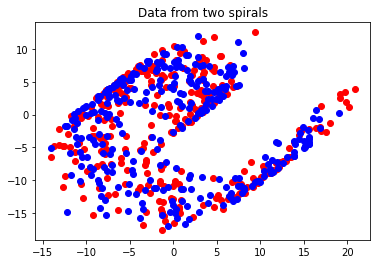

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

num_samples = 600
angle = np.linspace(0, 2*pi, int(num_samples/2))
mean = [0.0, 0.0]
cov = [[6.0, 6.0], [6.0, 6.0]]

X = np.zeros((num_samples, 2))

r_1 = 2 * angle + pi
data_1 = np.array([np.cos(angle) * r_1, np.sin(angle) * r_1]).T
X_1 = data_1 + np.random.multivariate_normal(mean, cov, int(num_samples/2))
X[:int(num_samples/2), :] = X_1

r_2 = 2 * angle - pi
data_2 = np.array([np.cos(angle) * r_2, np.sin(angle) * r_2]).T
X_2 = data_1 + np.random.multivariate_normal(mean, cov, int(num_samples/2))
X[int(num_samples/2):, :] = X_2

y = np.ones(num_samples)
y[int(num_samples/2):] = -1 * y[int(num_samples/2)]
#print(y)

print(X.shape)
print(y.shape)

figure, axes = plt.subplots(1)

plt.scatter(X[:int(num_samples/2), 0], X[:int(num_samples/2), 1], marker = 'o', color = 'red')
plt.scatter(X[int(num_samples/2):, 0], X[int(num_samples/2):, 1], marker = 'o', color = 'blue')

plt.title('Data from two spirals')
plt.show

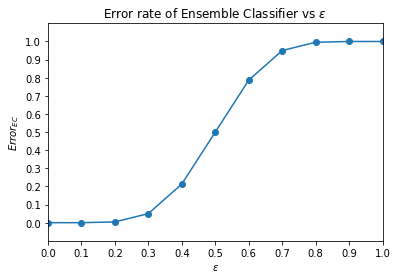

In [3]:
#Compute the error rates
import math

def comb(n, k):
  return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

epsilons = np.linspace(0, 1, 11)
errors = np.zeros(epsilons.shape)

num_classifiers = 15
eps_idx = 0
for epsilon in epsilons:
  error_EC = 0
  for j in np.arange(np.ceil(num_classifiers/2), num_classifiers + 1):
    err = comb(num_classifiers, j) * math.pow(epsilon, j) * math.pow(1 - epsilon, num_classifiers - j)
    error_EC += err
  errors[eps_idx] = error_EC
  eps_idx += 1

figure, ax = plt.subplots(1)

plt.plot(epsilons, errors, marker = 'o')
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$Error_{EC}$')
ax.set_xlim(0, 1)
ax.set_ylim(errors.min() - 0.1, errors.max() + 0.1)
ax.set_xticks(epsilons)
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_title('Error rate of Ensemble Classifier vs $\epsilon$')
plt.show()

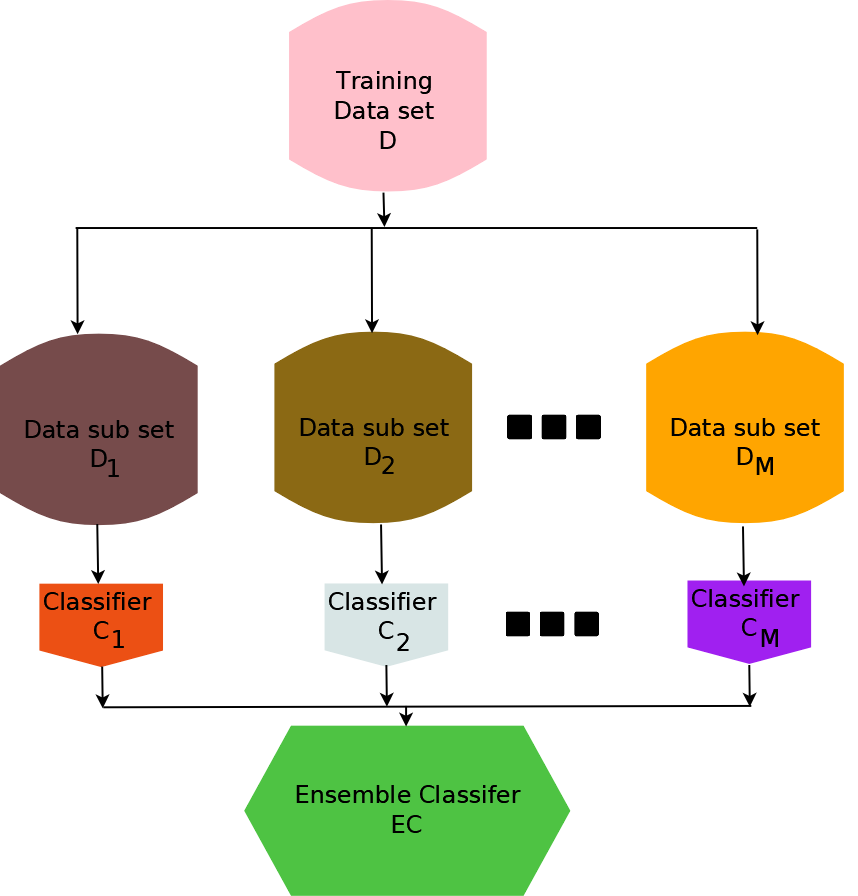

In [11]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/ensemble_classifier.png'))
img

In [4]:
np.random.seed(1000)
indexarr = np.arange(num_samples)
np.random.shuffle(indexarr)
#print(indexarr)

[438 346 486 136 481 132 368 422  43 573 484 177 570 168  79 528 399  14
 248  61 406  60  45  23 388  70 356 318 575 113 451 322  93 352  52 167
 585 376 360 410 453 315 554 434 364 127  37 467 176  65 243  33 288 394
 329 303 464 355 263 230   1 395 186  42 267 536 206 320 558 447 478 418
 229 245 474 296  36 133  40 347  28 116 551 462 548 310 184 162 306  55
 273 516 114 392  57 476 265 535 461 440 371 254   4 413 405 157 387 421
 297  89 148 472  98 218  64 285  26 509  21  41   6 429  51 247 374 403
 180 489 539  22 196  25 408 569 586 380 118 185 599 150 103  95 226 391
 337 543 427 475 370 321 457 153 562 537 525 596 120 343 128  27  29  24
 345 594 165 555 331 424 269  96 365 460 455 156 477 338 207 264 249 366
 101 220 479 183 540 179 225 533 189 108 222 527 178 390 237  75  46  69
  66 253  32  74 431 384 419 353 389 362 210 109 567 235 239 142 198  87
 505 122 102  92 121 308 378 192 117  16 134 295 272 530 299 369 181 258
 510 289  91 372 280 203 449 164  34 294 232 281 21

In [5]:
num_train = int(0.8 * num_samples)
num_test = num_samples - num_train
print('num_train:', num_train, 'num_test:', num_test)

num_train: 480 num_test: 120


In [7]:
train_X = X[indexarr[0 : num_train]]
train_y = y[indexarr[0 : num_train]]
print('train_X shape:', train_X.shape, 'train_Y shape:', train_y.shape)

train_X shape: (480, 2) train_Y shape: (480,)


In [8]:
test_X = X[indexarr[0 : num_test]]
test_y = y[indexarr[0 : num_test]]
print('test_X shape:', test_X.shape, 'test_Y shape:', test_y.shape)

test_X shape: (120, 2) test_Y shape: (120,)


classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
test accuracy from classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform') is 0.8333333333333334


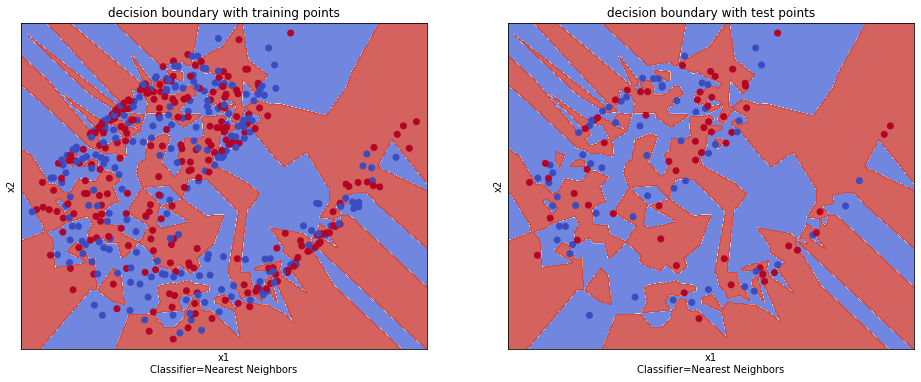

classifier: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
test accuracy from classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False) is 0.6166666666666667


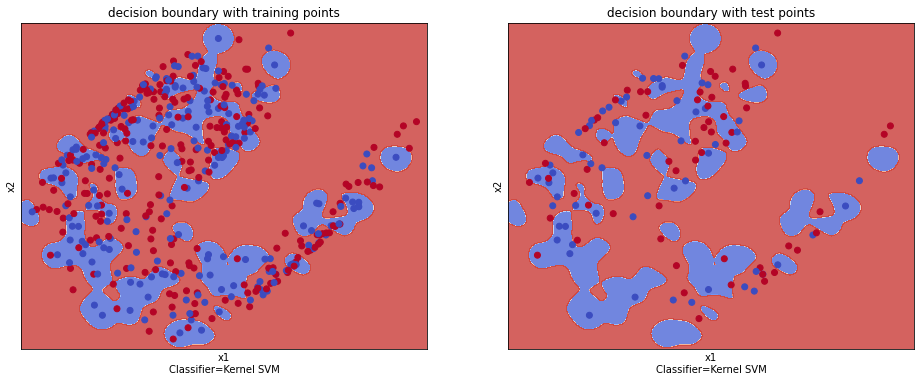

classifier: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
test accuracy from classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.7916666666666666


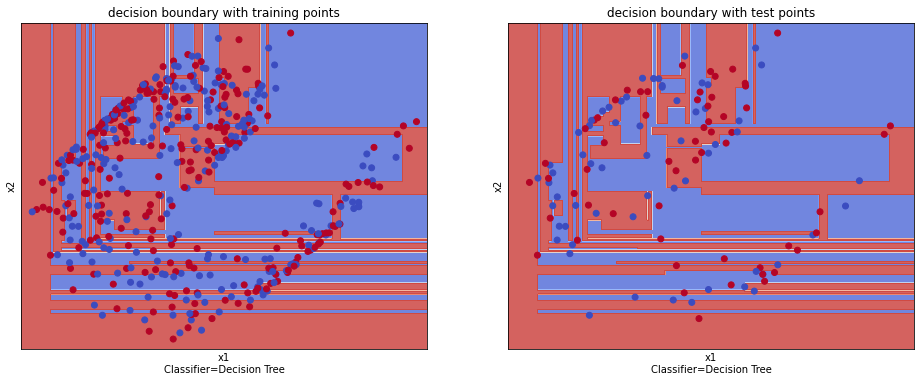

In [16]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

clf_list = []

clf_neigh = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
clf_svc = SVC(kernel = 'rbf', gamma = 1)
clf_tree = tree.DecisionTreeClassifier(criterion = 'entropy')

clf_list.append(clf_neigh)
clf_list.append(clf_svc)
clf_list.append(clf_tree)

clf_names = ['Nearest Neighbors', 'Kernel SVM', 'Decision Tree']
num_classifiers = 3

# create a mesh to plot in
h=0.05 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                    np.arange(x2_min, x2_max, h))
for i in range(num_classifiers):
  print('classifier:', clf_list[i])
  indexarr = np.arange(train_X.shape[0])
  np.random.shuffle(indexarr)
  partition_prop = 0.6
  num_samples_partition = int(partition_prop * train_X.shape[0])

  X_partition = train_X[indexarr[0 : num_samples_partition]]
  y_partition = train_y[indexarr[0: num_samples_partition]]

  base_clf = clf_list[i]
  base_clf_model = base_clf.fit(X_partition, y_partition.ravel())

  #test accuracy
  from sklearn.metrics import accuracy_score
  test_y_predicted = base_clf_model.predict(test_X)
  test_acc = accuracy_score(test_y, test_y_predicted)
  print('test accuracy from classifier', clf_list[i], 'is', test_acc)

  if i == 0:
    Z_all_clf = base_clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    # Put the result into a color plot
    Z = Z_all_clf.reshape(xx1.shape)

    test_pred_all_clf = test_y_predicted

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('x2')
    ax1.set_xlim(xx1.min(), xx1.max())
    ax1.set_ylim(xx2.min(), xx2.max())
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.set_title('decision boundary with training points')

    #plot the test points along with decision boundaries
    ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the test points
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('x2')
    ax2.set_xlim(xx1.min(), xx1.max())
    ax2.set_ylim(xx2.min(), xx2.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    ax2.set_title('decision boundary with test points')


    plt.show()

  elif i ==1:
    Z_base_clf = base_clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z_all_clf = np.column_stack( (Z_all_clf,Z_base_clf) )
    # Put the result into a color plot
    Z = Z_base_clf.reshape(xx1.shape)

    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('x2')
    ax1.set_xlim(xx1.min(), xx1.max())
    ax1.set_ylim(xx2.min(), xx2.max())
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.set_title('decision boundary with training points')

    #plot the test points along with decision boundaries
    ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the test points
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('x2')
    ax2.set_xlim(xx1.min(), xx1.max())
    ax2.set_ylim(xx2.min(), xx2.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    ax2.set_title('decision boundary with test points')


    plt.show()

  elif i==2:
    Z_base_clf = base_clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z_all_clf = np.column_stack( (Z_all_clf,Z_base_clf) )
    test_pred_all_clf = np.column_stack( (test_pred_all_clf,test_y_predicted) )
    
    Z = Z_base_clf.reshape(xx1.shape)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
    ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Put the result into a color plot
    
    # Plot also the training points
    ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('x2')
    ax1.set_xlim(xx1.min(), xx1.max())
    ax1.set_ylim(xx2.min(), xx2.max())
    ax1.set_xticks(())
    ax1.set_yticks(())
    ax1.set_title('decision boundary with training points')

    #plot the test points along with decision boundaries
    ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the test points
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
    # plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
    # plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
    xlabel = 'x1' + str('\n')+'Classifier='+str(clf_names[i])
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('x2')
    ax2.set_xlim(xx1.min(), xx1.max())
    ax2.set_ylim(xx2.min(), xx2.max())
    ax2.set_xticks(())
    ax2.set_yticks(())
    ax2.set_title('decision boundary with test points')


    plt.show()

In [17]:
Z_all_clf = np.array(Z_all_clf)
print(Z_all_clf.shape)

test_pred_all_clf = np.array(test_pred_all_clf)
print(test_pred_all_clf.shape)

(475916, 3)
(120, 3)


In [18]:
from scipy import stats

Z_all_clf = Z_all_clf.astype(int)

test_pred_all_clf = test_pred_all_clf.astype(int)


Z, counts = stats.mode(Z_all_clf, axis=1)

test_pred, counts = stats.mode(test_pred_all_clf, axis=1)
test_acc = accuracy_score(test_y, test_pred)
print('test accuracy from ensemble classifier is:', test_acc)

test accuracy from ensemble classifier is: 0.8416666666666667


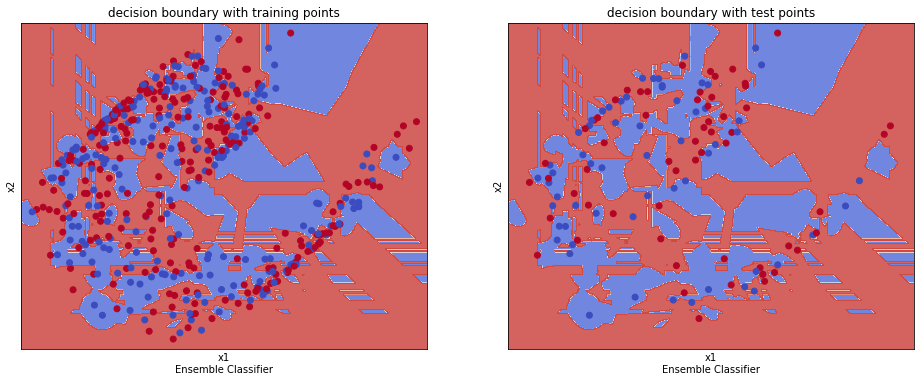

In [19]:
# Put the result into a color plot
Z = Z.reshape(xx1.shape)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Put the result into a color plot

# Plot also the training points
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
# plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
# plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
xlabel = 'x1' + str('\n')+'Ensemble Classifier'
ax1.set_xlabel(xlabel)
ax1.set_ylabel('x2')
ax1.set_xlim(xx1.min(), xx1.max())
ax1.set_ylim(xx2.min(), xx2.max())
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('decision boundary with training points')

#plot the test points along with decision boundaries
ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the test points
ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
# plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
# plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
xlabel = 'x1' + str('\n')+'Ensemble Classifier'
ax2.set_xlabel(xlabel)
ax2.set_ylabel('x2')
ax2.set_xlim(xx1.min(), xx1.max())
ax2.set_ylim(xx2.min(), xx2.max())
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('decision boundary with test points')


plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 100,  random_state=0)
clf_model = clf_rf.fit(train_X, train_y)

test_y_predicted = clf_model.predict(test_X)
test_acc = accuracy_score(test_y, test_y_predicted)
print('test accuracy from RF classifier: is:', test_acc)

test accuracy from RF classifier: is: 1.0


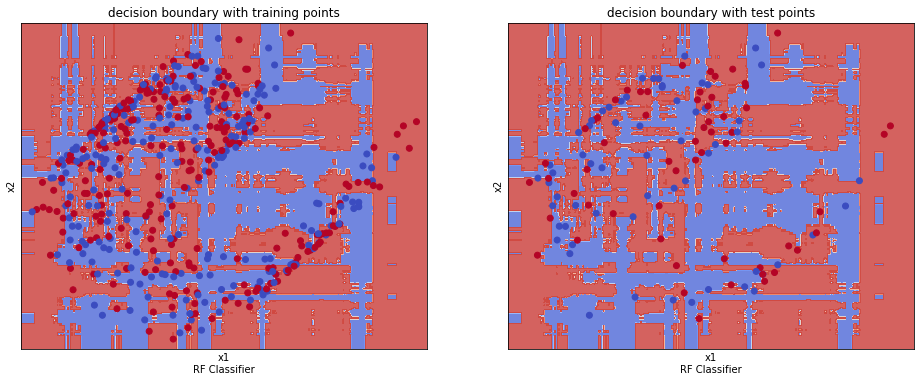

In [21]:
Z = clf_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Put the result into a color plot

# Plot also the training points
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=plt.cm.coolwarm)
# plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
# plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
xlabel = 'x1' + str('\n')+'RF Classifier'
ax1.set_xlabel(xlabel)
ax1.set_ylabel('x2')
ax1.set_xlim(xx1.min(), xx1.max())
ax1.set_ylim(xx2.min(), xx2.max())
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('decision boundary with training points')

#plot the test points along with decision boundaries
ax2.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the test points
ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=plt.cm.coolwarm)
# plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
# plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='s', color='green')
xlabel = 'x1' + str('\n')+'RF Classifier'
ax2.set_xlabel(xlabel)
ax2.set_ylabel('x2')
ax2.set_xlim(xx1.min(), xx1.max())
ax2.set_ylim(xx2.min(), xx2.max())
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('decision boundary with test points')


plt.show()